# Speech Recognition

https://www.gosmar.eu/machinelearning/2020/05/25/neural-networks-and-speech-recognition/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.np_utils import to_categorical

In [2]:
features = np.load("dev.npy",allow_pickle=True,encoding="bytes")
labels = np.load("dev_labels.npy",allow_pickle=True,encoding="bytes")

In [3]:
# X : subphonemes
# Y : label of subphonemes

x,y = np.vstack(features),np.hstack(labels)
x,y = StandardScaler().fit_transform(x), to_categorical(y)

In [4]:
x.shape, y.shape

((669294, 40), (669294, 138))

length of utterances = 367


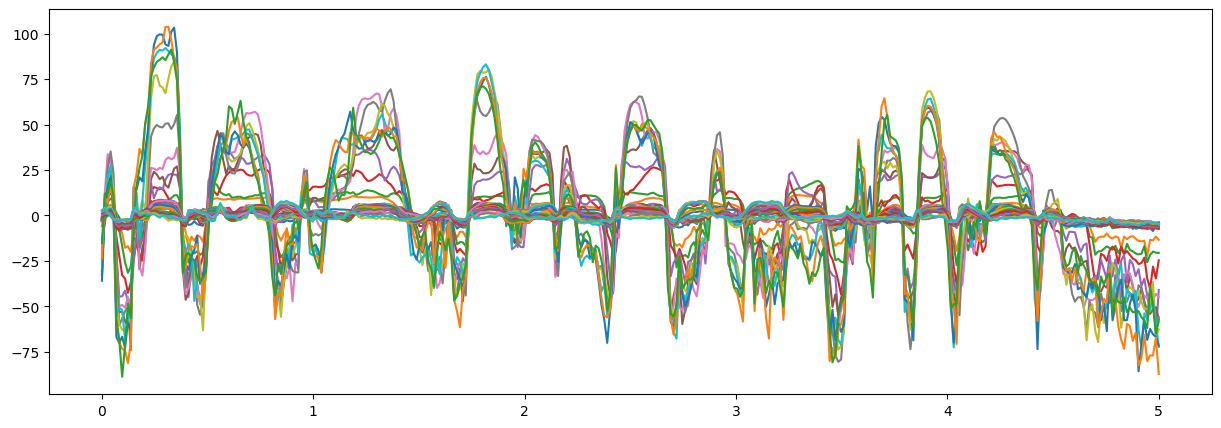

In [5]:
# plot of sound wave vs time graph

def plot_wave(feature):
    print("length of utterances = {}".format(len(feature)))
    time = np.linspace(0,5,len(feature))
    plt.figure(figsize=(15,5))
    plt.plot(time,feature)
    plt.plot()
    return


n = np.random.randint(0,len(features))
plot_wave(features[n])

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [8]:
x_train[0],y_train[0]

(array([ 0.726652  ,  1.0627108 ,  0.9723338 ,  1.0326502 ,  1.171851  ,
         1.2183937 ,  0.84872943,  0.8132946 ,  0.8844997 ,  0.9450416 ,
         1.0148052 ,  0.8362799 ,  0.8522567 ,  0.9442898 ,  1.1552713 ,
         1.6687493 ,  2.0047936 ,  1.4462386 ,  0.99948573,  0.94216025,
         1.034363  ,  1.2375747 ,  0.9960603 ,  0.83471763,  1.5441645 ,
         1.7766548 ,  1.6428415 ,  1.1317672 ,  0.6891641 ,  0.48688883,
         0.6481759 ,  1.1200932 ,  1.3799088 ,  1.0503263 ,  0.9071671 ,
        -0.01635373,  0.02371577,  0.61822665,  0.8243111 ,  0.9780581 ],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 

In [7]:
model = Sequential([
    Dense(512, input_dim = 40, activation="relu"),
    Dense(1024,activation="relu"),
    Dense(138,activation="softmax")
])

model.compile(optimizer = "adam",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

In [8]:
model.fit(x_train,y_train,batch_size=100,epochs=10)

Epoch 1/10
5020/5020 [==============================] - 68s 13ms/step - loss: 2.8968 - accuracy: 0.2652
Epoch 2/10
5020/5020 [==============================] - 63s 13ms/step - loss: 2.6786 - accuracy: 0.3051
Epoch 3/10
5020/5020 [==============================] - 59s 12ms/step - loss: 2.5770 - accuracy: 0.3235
Epoch 4/10
5020/5020 [==============================] - 71s 14ms/step - loss: 2.4987 - accuracy: 0.3390
Epoch 5/10
5020/5020 [==============================] - 63s 12ms/step - loss: 2.4314 - accuracy: 0.3514
Epoch 6/10
5020/5020 [==============================] - 102s 20ms/step - loss: 2.3723 - accuracy: 0.3628
Epoch 7/10
5020/5020 [==============================] - 90s 18ms/step - loss: 2.3184 - accuracy: 0.3737
Epoch 8/10
5020/5020 [==============================] - 72s 14ms/step - loss: 2.2695 - accuracy: 0.3833
Epoch 9/10
5020/5020 [==============================] - 69s 14ms/step - loss: 2.2242 - accuracy: 0.3927
Epoch 10/10
5020/5020 [==============================] - 70s 14

In [9]:
h = model.evaluate(x_test,y_test)

5229/5229 [==============================] - 21s 4ms/step - loss: 2.5677 - accuracy: 0.3413


In [10]:
p = model.predict(x_test)

5229/5229 [==============================] - 19s 4ms/step


In [11]:
n = 150
x_test[n],np.argmax(y_test[n]),np.argmax(p[n])

(array([ 0.8663201 ,  0.9057471 ,  1.1846077 ,  0.8503084 ,  0.6648441 ,
         0.7539109 ,  0.4126247 ,  1.119659  ,  0.8485781 ,  0.970606  ,
         1.0078351 ,  1.2983361 ,  1.3929417 ,  1.3027971 ,  0.926368  ,
         0.3751935 , -0.07352614, -0.48851827, -0.6136637 , -0.51231307,
        -0.36874893, -0.00404688,  0.25315788,  0.5005607 ,  0.6974238 ,
         0.34233227,  0.09381792,  0.48316714,  0.91764045,  0.7392904 ,
         0.26570028,  0.4494678 ,  0.16620973, -0.1525676 , -0.00196638,
        -0.12792623, -0.40633368, -0.9925577 , -1.1229285 , -0.8672424 ],
       dtype=float32),
 79,
 90)

In [12]:
y_ = []
for i in p: y_.append(np.argmax(i))
y_ = np.array(y_)

In [13]:
idx = [i for i in range(len(y_))]
len(y_)

167324

In [14]:
d = pd.DataFrame({"id":idx,"labels":y_})

In [15]:
d

,id,labels
0,0,109
1,1,98
2,2,50
3,3,19
4,4,79
...,...,...
167319,167319,21
167320,167320,110
167321,167321,108
167322,167322,58


In [18]:
d.to_csv("solved.csv",index=False)